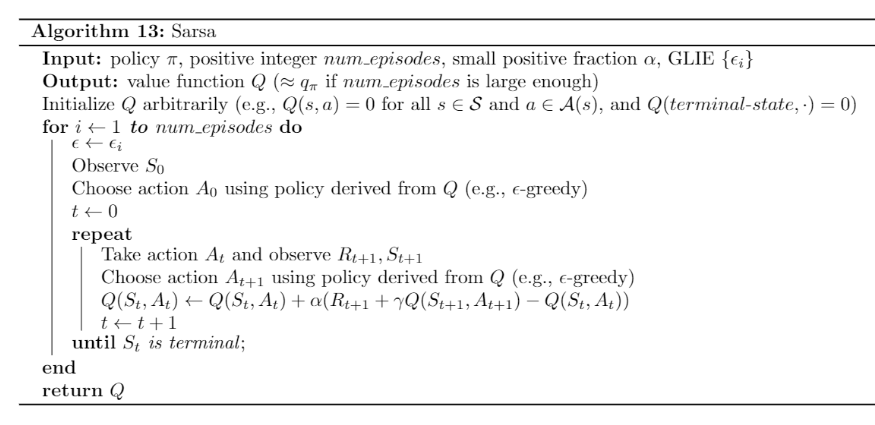

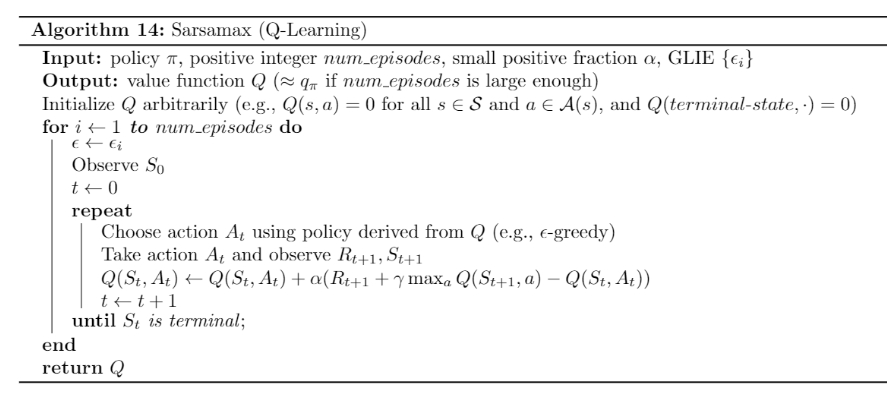

In [ ]:
import gym
import numpy as np
from collections import defaultdict

In [ ]:
env = gym.make("CliffWalking-v0")
env.observation_space, env.action_space

(Discrete(48), Discrete(4))

In [ ]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



In [ ]:
def get_greedy_action(Q, state, nA, epsilon):
    if np.random.random() < epsilon:
        action = np.argmax(Q[state])
    else:
        action = np.random.choice(np.arange(nA))

    return action

def update_Q_sarsa(alpha, gamma, Q, state, action, reward, next_state=None, next_action=None):
    current = Q[state][action]
    Q_next = Q[next_state][next_action] if next_state is not None else 0
    new_Q_val = current + alpha * (reward + (gamma * Q_next) - current)

    return new_Q_val

def update_Q_learning(alpha, gamma, Q, state, action, reward, next_state=None):
    current = Q[state][action]
    Q_next = np.max(Q[next_state]) if next_state is not None else 0
    new_Q_val = current + alpha * (reward + (gamma * Q_next) - current)

    return new_Q_val

In [ ]:
def sarsa(env, episodes, alpha, gamma):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))

    for ep in range(1, episodes + 1):
        ep_reward = 0
        state = env.reset()
        epsilon = 1 / ep
        action = get_greedy_action(Q, state, nA, epsilon)

        while True:
            next_state, reward, done, _ = env.step(action)
            ep_reward += reward

            if not done:    
                next_action = get_greedy_action(Q, next_state, nA, epsilon)
                Q[state][action] = update_Q_sarsa(alpha, gamma, Q, state, action, reward, next_state, next_action)
                
                state = next_state
                action = next_action
            else:
                Q[state][action] = update_Q_sarsa(gamma, alpha, Q, state, action, reward)
                break

    return Q

In [ ]:
def q_learning(env, episodes, alpha, gamma):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))

    for ep in range(1, episodes + 1):
        ep_reward = 0
        state = env.reset()
        epsilon = 1 / ep

        while True:
            action = get_greedy_action(Q, state, nA, epsilon)
            next_state, reward, done, _ = env.step(action)
            ep_reward += reward

            Q[state][action] = update_Q_learning(alpha, gamma, Q, state, action, reward, next_state)
            state = next_state
            if done:
                break

    return Q

In [ ]:
Q_sarsa = sarsa(env, 5000, 0.01, 1.0)
Q_learning = q_learning(env, 5000, 0.01, 1.0)

In [ ]:
def play(env, episodes, max_steps, Q, render):
    rewards = 0
    for ep in range(episodes):
        s = env.reset()

        for step in range(max_steps):
            if render:
                env.render()
                
            a = np.argmax(Q[s])
            s, r, done, _ = env.step(a)
            rewards += r
            if done:
                break

    print(f"Score: {rewards / episodes}")

In [ ]:
print("Sarsa:")
play(env, 50, 100, Q_sarsa, False)

print("")

print("Q-learning:")
play(env, 50, 100, Q_learning, False)

Sarsa:
Score: -17.0

Q-learning:
Score: -13.0


In [ ]:
play(env, 1, 50, Q_sarsa, True)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  x

In [ ]:
play(env, 1, 50, Q_learning, True)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o